<a href="https://colab.research.google.com/github/sipocz/messer/blob/main/messer_villamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Page #2


# Villamos Energia mérések


In [4]:
# !pip install lazypredict # nem használjuk, de majd meglátjuk

In [5]:
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import zipfile
#import lazypredict
#from lazypredict.Supervised import LazyRegressor # nem használjuk, de majd meglátjuk

In [6]:
fname="SB_1TRE_1_4_R00274.zip"
url="https://github.com/sipocz/messer/blob/main/"+fname
basedir="/content/"
localfname=basedir+fname
print (f"!rm {localfname}")
print(f"!wget {url}")

!rm /content/SB_1TRE_1_4_R00274.zip
!wget https://github.com/sipocz/messer/blob/main/SB_1TRE_1_4_R00274.zip


In [7]:
#Nitrogén predikció
!rm /content/SB_1TRE_1_4_R00274
!rm /content/SB_1TRE_1_4_R00274.zip
!wget https://github.com/sipocz/messer/raw/main/SB_1TRE_1_4_R00274.zip
!unzip /content/SB_1TRE_1_4_R00274.zip 
!rm /content/SB_1TRE_1_4_R00274.zip


rm: cannot remove '/content/SB_1TRE_1_4_R00274.zip': No such file or directory
--2021-02-23 22:30:30--  https://github.com/sipocz/messer/raw/main/SB_1TRE_1_4_R00274.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/messer/main/SB_1TRE_1_4_R00274.zip [following]
--2021-02-23 22:30:31--  https://raw.githubusercontent.com/sipocz/messer/main/SB_1TRE_1_4_R00274.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25759170 (25M) [application/zip]
Saving to: ‘SB_1TRE_1_4_R00274.zip’

SB_1TRE_1_4_R00274. 100%[===================>]  24.57M  87.7MB/s    in 0.3s    

2021-02-23 22:30:32 (87.7 MB/s)

In [8]:
df=pd.read_csv(localfname[:-4], usecols=[1,2,3],header=None )

In [9]:
df.columns=["Date","Time","A"]


In [11]:
df2=df.Date+df.Time
df_all=pd.DataFrame(data={"timeStamp":df2,"A":df.A})

df_all.head()
a=df_all.timeStamp[0]

In [12]:
df2.head()

0     2020. 1. 3  0. 2. 1
1     2020. 1. 3  0. 3.21
2     2020. 1. 3  0. 4.51
3     2020. 1. 3  0. 4.56
4     2020. 1. 3  0.14.28
dtype: object

In [14]:
db=0
for i in df_all.index:
    a=df2.loc[i]
    b=a.strip().replace(". ",".0").replace("  "," 0")
    #db+=1
    #if db%100000==0: 
    #    print("#",end="")

    df2.loc[i]=b

In [15]:
df2.head()

0    2020.01.03 00.02.01
1    2020.01.03 00.03.21
2    2020.01.03 00.04.51
3    2020.01.03 00.04.56
4    2020.01.03 00.14.28
dtype: object

In [17]:

df_all=pd.DataFrame(data={"timeStamp":df2,"A":df.A})

df_all.head()


,timeStamp,A
0,2020.01.03 00.02.01,19.7461
1,2020.01.03 00.03.21,20.0571
2,2020.01.03 00.04.51,21.2830
3,2020.01.03 00.04.56,19.8935
4,2020.01.03 00.14.28,21.4223


In [18]:
df_all["timeStamp"]=pd.to_datetime(df_all["timeStamp"],format="%Y.%m.%d %H.%M.%S")

In [19]:
df_all.head()

,timeStamp,A
0,2020-01-03 00:02:01,19.7461
1,2020-01-03 00:03:21,20.0571
2,2020-01-03 00:04:51,21.2830
3,2020-01-03 00:04:56,19.8935
4,2020-01-03 00:14:28,21.4223


In [32]:
pro_df=pd.DataFrame(data={"ds":df_all.timeStamp,"y":df_all.A})

In [33]:
pro_df

,ds,y
0,2020-01-03 00:02:01,19.7461
1,2020-01-03 00:03:21,20.0571
2,2020-01-03 00:04:51,21.2830
3,2020-01-03 00:04:56,19.8935
4,2020-01-03 00:14:28,21.4223
...,...,...
2714584,2020-12-17 11:51:45,2.9317
2714585,2020-12-17 11:51:57,6.0996
2714586,2020-12-17 11:52:05,2.8609
2714587,2020-12-17 11:52:22,4.1359


In [36]:
pro_df.head()
pro_df.set_index("ds",inplace=True)

In [37]:
resample_mean =  pro_df.resample("60min").agg({'y': 'mean'})

In [38]:
pro_df=resample_mean

In [39]:
pro_df

,y
ds,
2020-01-03 00:00:00,20.440410
2020-01-03 01:00:00,20.401226
2020-01-03 02:00:00,20.543827
2020-01-03 03:00:00,20.530319
2020-01-03 04:00:00,20.531604
...,...
2020-12-30 21:00:00,NaN
2020-12-30 22:00:00,NaN
2020-12-30 23:00:00,NaN


In [42]:
pro_df.index

DatetimeIndex(['2020-01-03 00:00:00', '2020-01-03 01:00:00',
               '2020-01-03 02:00:00', '2020-01-03 03:00:00',
               '2020-01-03 04:00:00', '2020-01-03 05:00:00',
               '2020-01-03 06:00:00', '2020-01-03 07:00:00',
               '2020-01-03 08:00:00', '2020-01-03 09:00:00',
               ...
               '2020-12-30 16:00:00', '2020-12-30 17:00:00',
               '2020-12-30 18:00:00', '2020-12-30 19:00:00',
               '2020-12-30 20:00:00', '2020-12-30 21:00:00',
               '2020-12-30 22:00:00', '2020-12-30 23:00:00',
               '2020-12-31 00:00:00', '2020-12-31 01:00:00'],
              dtype='datetime64[ns]', name='ds', length=8714, freq='60T')

In [43]:
fb_df=pd.DataFrame(data={"ds":pro_df.index,"y":pro_df.y})

In [44]:
fb_df.head()

,ds,y
ds,,
2020-01-03 00:00:00,2020-01-03 00:00:00,20.440410
2020-01-03 01:00:00,2020-01-03 01:00:00,20.401226
2020-01-03 02:00:00,2020-01-03 02:00:00,20.543827
2020-01-03 03:00:00,2020-01-03 03:00:00,20.530319
2020-01-03 04:00:00,2020-01-03 04:00:00,20.531604


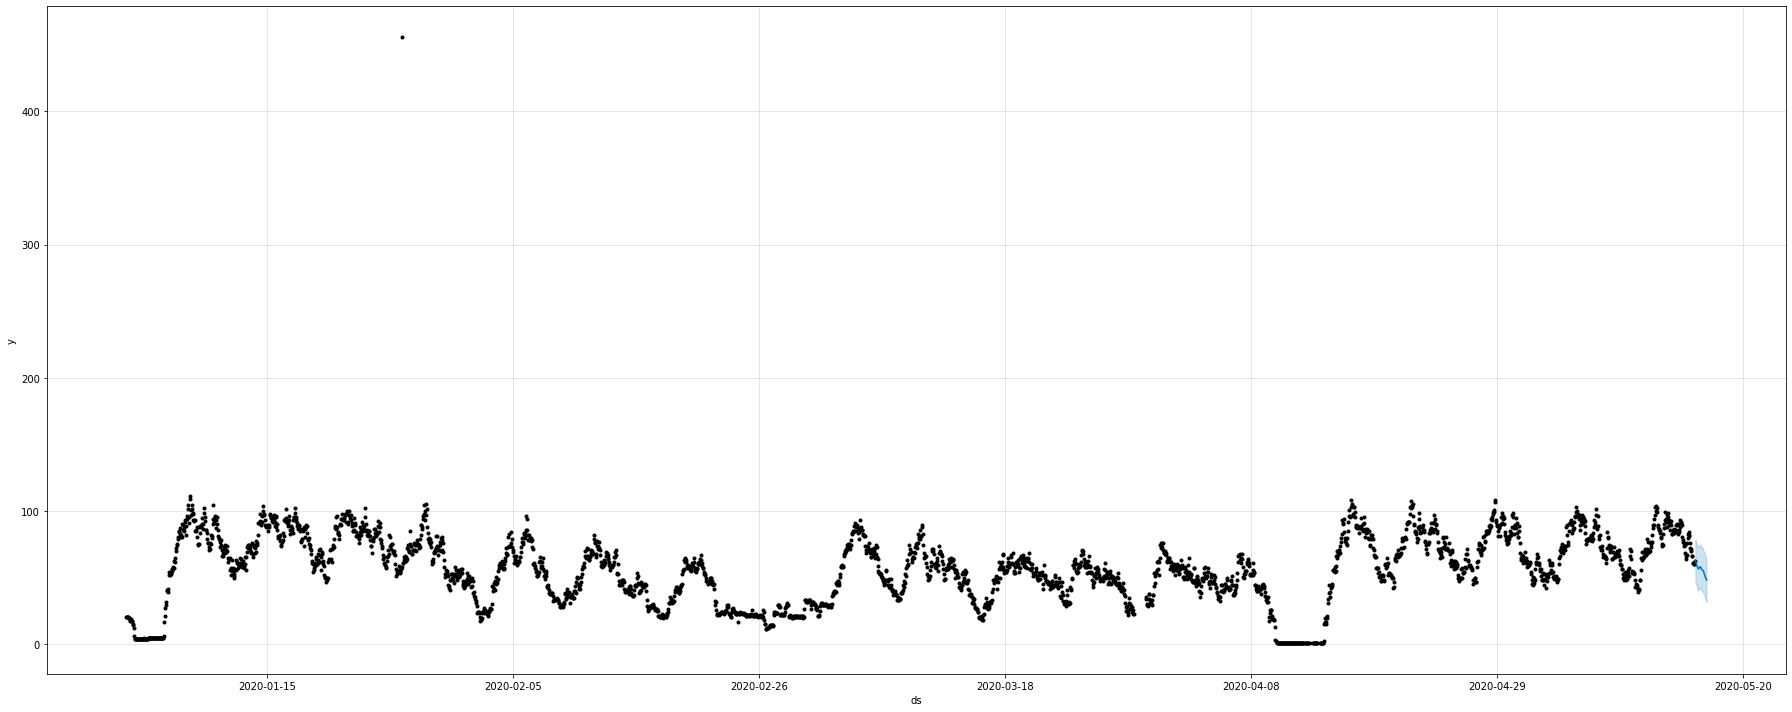

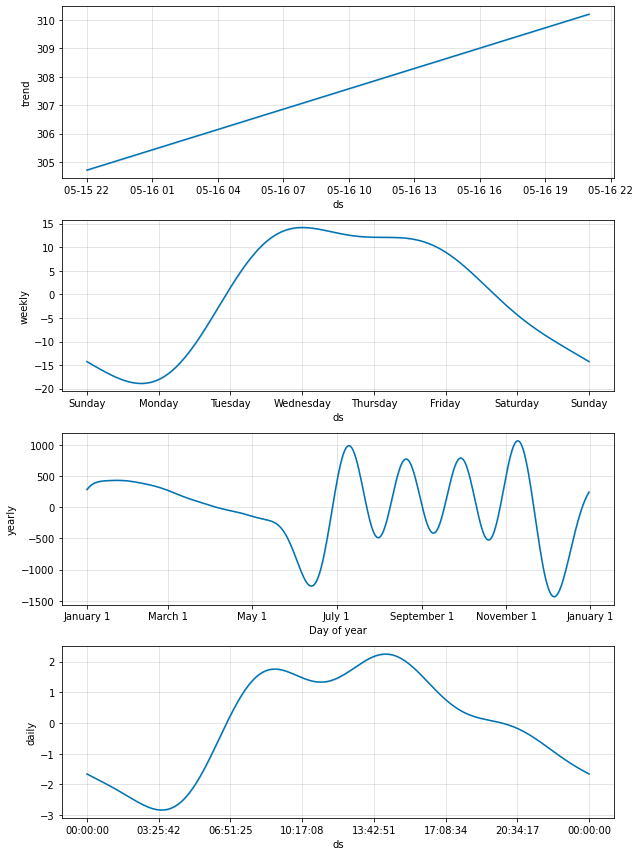

In [56]:
DX=24
X1=-5500
DX1=X1+DX
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True)

m.fit(fb_df[:X1])
forecast = m.predict(fb_df[X1:DX1],)

profet_graf=m.plot(forecast,figsize=(25,10),)
m.plot_components(forecast);

In [57]:

# Python
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
import pandas as pd

fbfig=plot_plotly(m, forecast)


fbfig.update_layout(
    autosize=False,
    width=1600,
    height=900,
    
    )

fbfig.add_trace(
    go.Scatter(x=fb_df[X1:DX1].ds, y=pro_df[X1:DX1].y,
            name="Test data",
            showlegend=True,
            mode="markers",
            marker=dict(color='rgba(200,0,0,0.9)', 
            symbol="diamond")   ),
 
   
    


)


fbfig.show()